In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from time import sleep
from world import World
from agent_simple_random import Agent_simple_random 
from agent_hemilton_cycle import Agent_hemilton_cycle

w = World()

In [2]:
%matplotlib tk
plt.ion()
# fig, ax = plt.subplots()

In [ ]:
Agent_genetic([
    [[[input_size, random], zero, identity], [[input_size, random], zero, identity]], 
    [[[2, random], random, identity, [3, zeros]]], [[[2, random], random, identity, [3, zeros]]]]
])

In [1]:
class Agent_genetic():
    def __init__(self, specifications : list[list]):
        
        self.inputSize = 6
        for layer in specifications[:-1]:
            for neuron in layer:
                
        # self.inputLayer = np.zeros(inputLayerSize)
        # self.lastValues : list[float] = []
        # self.hiddenLayers = []
        # self.input_ = []
        
        # setup layers
        
        self.hiddenLayers = []
        self.input = self.createInput()
        self.hiddenLayers.append(denl.Layer_Dense(len(self.input), self.inputLayerSize, enums.weightModes.Random, enums.biasModes.Random))
        self.hiddenLayers.append(denl.Layer_Dense(self.inputLayerSize, 3))

        
        
    
    def create_input(self, info_left, distance_left, info_forward, distance_forward, info_right, distance_right):
        pass
    
    def move():
        pass
    
    def create_offsprings(self):
        pass
    
    
        


In [3]:
%matplotlib tk

agent = Agent_hemilton_cycle()
# agent = Agent_simple_random()
w = World()
def game(agent, w, plot=False):
    if plot: fig, ax = plt.subplots()
    while not w.game_over:
        agent_decision = agent.move(*w.view_3_end())
        w.step(agent_decision)
        if plot:
            ax.matshow(w.obs, origin='upper')
            plt.pause(0.01)
            sleep(0.01)

    # print(f'score {w.score}, steps {w.steps}')
    return w
w = game(agent, w, plot=False)

%matplotlib inline

In [4]:
w

                |
      ░░░░░░░░  |
      ░░░░░░░░  |
◯◯    ░░░░░░██  |
    ░░░░░░░░    |
    ░░░░░░░░    |
    ░░░░░░░░    |
    ░░░░░░░░    | score=26  Game Over

In [5]:
w.game_over

True

In [6]:
%matplotlib inline

In [7]:
scores = []
step_counts = []
for ii in range(100):
    agent = Agent_hemilton_cycle()
    w = World()
    w = game(agent, w)
    scores.append(w.score)
    step_counts.append(w.steps)

Text(0.5, 0, 'game')

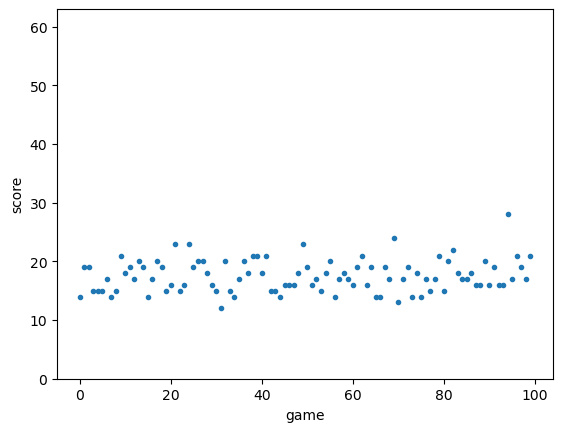

In [8]:
plt.plot(scores, '.')
plt.ylim(0,63)
plt.ylabel('score')
plt.xlabel('game')

In [9]:
1/0

ZeroDivisionError: division by zero

# Agent genetic

In [ ]:
import numpy as np
#import tensorflow as tf
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
import sys
import numpy as  np
import matplotlib
from . import serverConfig as sc, server as srvr, clientBase as cb, enums
from modules.GeneticAI import Activation_ReLU as relu, Dense_Layer as denl
import logging, sys

class ClientGenetic(cb.ClientBase):

    # properties ------------
    server = object
    inputLayer = np.zeros(1)

    # ctor -----------

    def init(self):
        self.server = srvr.Server(sc.ServerConfig(enums.serverModes.Auto, 1, self.fpsCallback, self.newGameCallback, 10000))

    # public ------------

    def fpsCallback(self, movesRemaining):
        print(movesRemaining)

        return enums.directions.Skip

    def newGameCallback(self, gamesRemaining):
        pass

    # private ------------

    def preprocess_state(self):  # world and look_dir could be parameters
        # finding look_dir in order to know which objects are on our right etc.
        head = None
        neck = None
        body = None
        tail = None
        tail_value = 0
        world = server.getGameState().world
        size = server.getGameState().width
        #for y in range(size):
        #    for x in range(size):
        #        if world[y][x] == 1:
        #            head = [y, x]
        #            world[y][x] += 1
        #        elif world[y][x] == 2:
        #            neck = [y, x]
        #            world[y][x] += 1
        #        elif world[y][x] > 2:
        #            body = [y, x]
        #            world[y][x] += 1
        #        if world[y][x] > tail_value:
        #            tail = [y, x]
        #            tail_value = world[y][x]

        y = head[0] - neck[0]
        x = head[1] - neck[1]
        look_dir = [y, x]

        look_dirs = [[0, -1], [-1, 0], [0, 1], [1, 0]]
        look_dir_index = look_dirs.index(look_dir)
        info_left = []
        distance_left = []  # actually its positions
        info_forward = []
        distance_forward = []
        info_right = []
        distance_right = []

        for ii in range(1, 4):
            shift_left = look_dirs[look_dir_index - 1]
            pixel_left_y = head[0] + ii * (shift_left[0])
            pixel_left_x = head[1] + ii * (shift_left[1])
            if (pixel_left_x > size - 1) or (pixel_left_y > size - 1) or (pixel_left_x < 0) or (
                    pixel_left_y < 0):  # if we can still move
                info_left.append(-2)
                distance_left.append(ii)
                break
            if world[pixel_left_y][pixel_left_x] != 0:
                info_left.append(world[pixel_left_y][pixel_left_x])
                distance_left.append(ii)

        for ii in range(1, 4):
            shift_forward = look_dirs[look_dir_index]
            pixel_forward_y = head[0] + ii * (shift_forward[0])
            pixel_forward_x = head[1] + ii * (shift_forward[1])
            if (pixel_forward_x > size - 1) or (pixel_forward_y > size - 1) or (pixel_forward_x < 0) or (
                    pixel_forward_y < 0):  # if we can still move
                info_forward.append(-2)
                distance_forward.append(ii)
                break
            if world[pixel_forward_y][pixel_forward_x] != 0:
                info_forward.append(world[pixel_forward_y][pixel_forward_x])
                distance_forward.append(ii)

        for ii in range(1, 4):
            if look_dir_index == 3:
                shift_right = look_dirs[0]
            else:
                shift_right = look_dirs[look_dir_index + 1]
            pixel_right_y = head[0] + ii * (shift_right[0])
            pixel_right_x = head[1] + ii * (shift_right[1])
            if (pixel_right_x > size - 1) or (pixel_right_y > size - 1) or (pixel_right_x < 0) or (
                    pixel_right_y < 0):  # if we can still move
                info_right.append(-2)
                distance_right.append(ii)
                break
            if world[pixel_right_y][pixel_right_x] != 0:
                info_right.append(world[pixel_right_y][pixel_right_x])
                distance_right.append(ii)

        if len(distance_left) != 0:
            input_layer[0] = 1 if ((distance_left[0] == 1) and (
                        (info_left[0] > 1 and info_left[0] != tail_value) or info_left[
                    0] == -2)) else 0  # there is an obsticle on the left (distance 1)
        if len(distance_forward) != 0:
            input_layer[1] = 1 if ((distance_forward[0] == 1) and (
                        (info_forward[0] > 1 and info_forward[0] != tail_value) or info_forward[0] == -2)) else 0
        if len(distance_right) != 0:
            input_layer[2] = 1 if ((distance_right[0] == 1) and (
                        (info_right[0] > 1 and info_right[0] != tail_value) or info_right[0] == -2)) else 0
        input_layer[3] = 1 if (-1 in info_left) else 0  # food in range 3 to the right
        input_layer[4] = 1 if (-1 in info_forward) else 0
        input_layer[5] = 1 if (-1 in info_right) else 0

        return input_layer


def onehot_encode(index, length):
    a = np.zeros((length,), dtype=np.uint8)
    a[index] = 1
    return a



X = preprocess_state(GameState.world) #instead of obs


X = preprocess_state()

# Dense layer
class Layer_Dense:
 # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) #already transposed matrix of weights for every neuron
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
    # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
     # Forward pass
     def forward(self, inputs):
         # Calculate output values from input
         self.output = np.maximum(0, inputs)

dense1 = denl.Layer_Dense(6, 5)

activation1 = relu.Activation_ReLU()
#print(activation1.output)

dense1.forward(X)
#print(dense1.output)

activation1.forward(dense1.output)

print(activation1.output[:5])



#
# layer2 = Layer_Dense(5, 3)
#
#
# print(layer1)
# layer2.forward(layer1.output)
# print(layer2.output)


# In[ ]:





# In[ ]:


#output 2. vrstvy
#plan:
#batches neresime, 2 dense layers, vahy random, aktivacni fce, input, output
